# Analyzing the trends of COVID-19 with Python 

####Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends


FLOW OF THE PROJECT
1. Covid Spread In The World
2. Concentrate on major 4 countries
3. Particular in INDIA (STATES)
4. Per Day Cases
5. Confirmed, Deaths & Recovered -------> Trend



In [ ]:
#@title Covid Spread In The World


In [ ]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#load dataset

data=pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
#renaming the some columns 

data=data.rename(columns={'Province/State':'state','Country/Region':'country'})
data.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
data.shape

(19220, 8)

In [ ]:
#including new column 'ACTIVE' to check the active cases 

data['active']=data['Confirmed']-data['Deaths']-data['Recovered']
data.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [ ]:
# countries with more active,deaths,recovered cases
print(data['Date'].min())
print(data['Date'].max())
highest=data[data['Date']==data['Date'].max()]
highest.head()
world=highest.groupby('country')['Confirmed','active', 'Deaths'].sum().reset_index()
world.head()

2020-01-22 00:00:00
2020-03-23 00:00:00


,country,Confirmed,active,Deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [ ]:
#Visualize the data using choropleth for more interactive visualization 
fig=px.choropleth(world, locations='country', locationmode='country names', color='active', hover_name='country', range_color=[1,1000], color_continuous_scale='plasma',title='Countries with active cases')
fig.show()

[Text(0, 0.5, 'total cases'), Text(0.5, 0, 'Dates')]

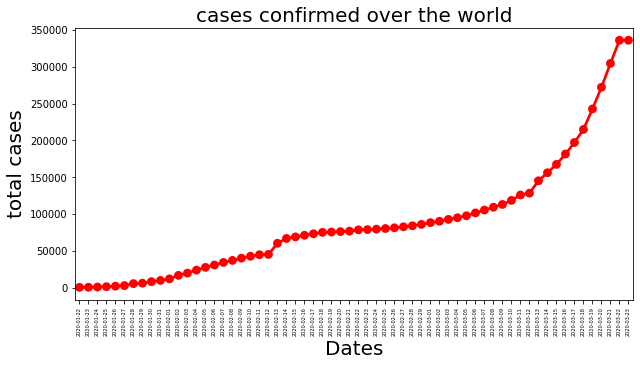

In [ ]:
#Identify the trend of increase of covid19 using pointplot

plt.figure(figsize=(10,5))
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=10)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Total cases',fontsize=20)
plt.title('cases confirmed over the world',fontsize=20)
tcase=data.groupby('Date')['Date','Confirmed'].sum().reset_index()
#print(tcase['Date'])
tcase['Date']=pd.to_datetime(tcase['Date'])
#print(tcase['Date'])
pl=sns.pointplot(x=tcase.Date.dt.date, y=tcase.Confirmed, color='r')
pl.set(xlabel='Dates', ylabel='total cases')

In [ ]:
# Find the countries with highest active cases
highactive=highest.groupby(by='country')['active'].sum().sort_values(ascending=False).head().reset_index()
highactive

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0


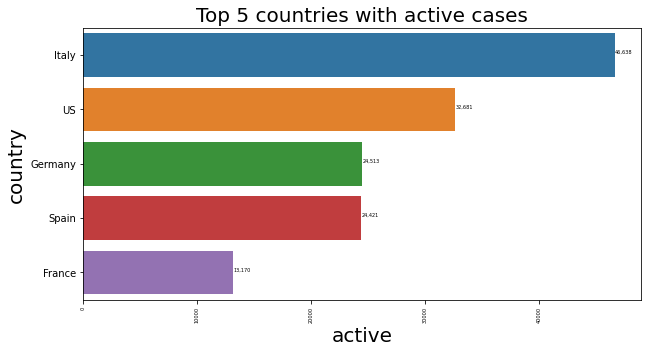

In [ ]:
# plot the countries with highactive cases in a barplot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=10)
plt.xlabel('Total cases',fontsize=20)
plt.ylabel('countries',fontsize=20)
plt.title('Top 5 countries with active cases',fontsize=20)
pl=sns.barplot(x=highactive.active, y=highactive.country)
for i, (value,name) in enumerate(zip(highactive.active,highactive.country)):
  pl.text(value, i-.05, f"{value:,.0f}", size=5,ha='left',va='center')


In [ ]:
# Find the countries with highest deaths 
highdeath=highest.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).head().reset_index()
highdeath

,country,Deaths
0,Italy,5476.0
1,China,3274.0
2,Spain,1772.0
3,Iran,1685.0
4,France,674.0


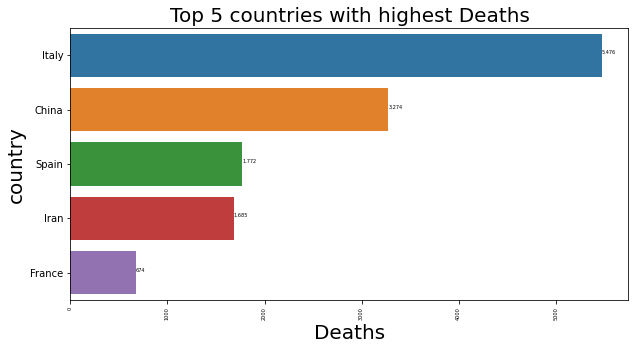

In [ ]:
# plot the countries with highdeaths in a barplot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=10)
plt.xlabel('Total deaths',fontsize=20)
plt.ylabel('countries',fontsize=20)
plt.title('Top 5 countries with highest Deaths',fontsize=20)
pl=sns.barplot(x=highdeath.Deaths, y=highdeath.country)
for i, (value,name) in enumerate(zip(highdeath.Deaths,highdeath.country)):
  pl.text(value, i-.05, f"{value:,.0f}", size=5,ha='left',va='center')

In [ ]:
# Find the countries with highest deaths 
highrecovered=highest.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).head().reset_index()
highrecovered

,country,Recovered
0,China,72814.0
1,Iran,7931.0
2,Italy,7024.0
3,South Korea,2909.0
4,Spain,2575.0


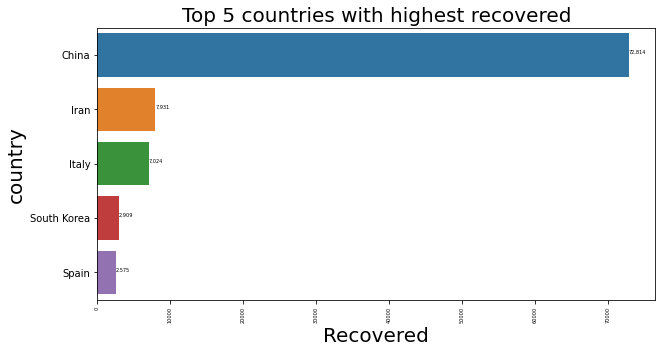

In [ ]:
# plot the countries with highrecovered in a barplot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=10)
plt.xlabel('Total Recovered',fontsize=20)
plt.ylabel('countries',fontsize=20)
plt.title('Top 5 countries with highest recovered',fontsize=20)
pl=sns.barplot(x=highrecovered.Recovered, y=highrecovered.country)
for i, (value,name) in enumerate(zip(highrecovered.Recovered,highrecovered.country)):
  pl.text(value, i-.05, f"{value:,.0f}", size=5,ha='left',va='center')

In [ ]:
#@title Concentrate on major 4 countries


In [ ]:
# creating a dataframes for 4 countries includes active case,deaths,recovered
## china
china=data[data.country=='China']
china.head()
china=china.groupby(by='Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
china.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-22,548.0,17.0,28.0,503.0
1,2020-01-23,643.0,18.0,30.0,595.0
2,2020-01-24,920.0,26.0,36.0,858.0
3,2020-01-25,1406.0,42.0,39.0,1325.0
4,2020-01-26,2075.0,56.0,49.0,1970.0


In [ ]:
#italy
italy=data[data.country=='Italy']
italy.head()
italy=italy.groupby(by='Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop('index',axis=1)
italy.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-31,2.0,0.0,0.0,2.0
1,2020-02-01,2.0,0.0,0.0,2.0
2,2020-02-02,2.0,0.0,0.0,2.0
3,2020-02-03,2.0,0.0,0.0,2.0
4,2020-02-04,2.0,0.0,0.0,2.0


In [ ]:
#spain
spain=data[data.country=='Spain']
spain.head()
spain=spain.groupby(by='Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
spain=spain.iloc[10:].reset_index().drop('index',axis=1)
spain.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-02-01,1.0,0.0,0.0,1.0
1,2020-02-02,1.0,0.0,0.0,1.0
2,2020-02-03,1.0,0.0,0.0,1.0
3,2020-02-04,1.0,0.0,0.0,1.0
4,2020-02-05,1.0,0.0,0.0,1.0


In [ ]:
#india
india=data[data.country=='India']
india
india=india.groupby(by='Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
india=india.iloc[9:].reset_index().drop('index',axis=1)
india.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-31,1.0,0.0,0.0,1.0
1,2020-02-01,1.0,0.0,0.0,1.0
2,2020-02-02,2.0,0.0,0.0,2.0
3,2020-02-03,3.0,0.0,0.0,3.0
4,2020-02-04,3.0,0.0,0.0,3.0


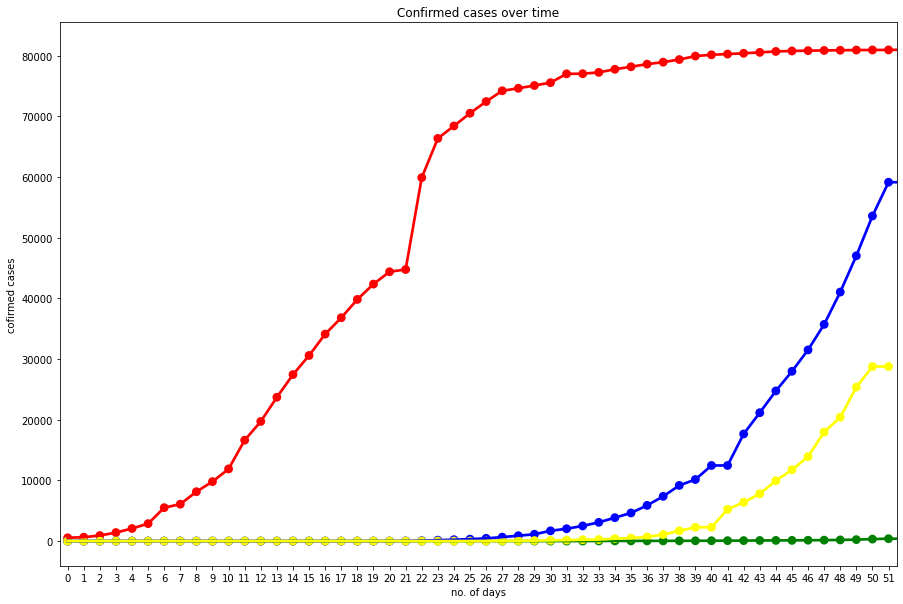

In [ ]:
#plot the confirmed cases of 4 countries for analysis
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Confirmed,color='Red')
sns.pointplot(india.index,india.Confirmed,color='Green')
sns.pointplot(italy.index,italy.Confirmed,color='Blue')
sns.pointplot(spain.index,spain.Confirmed,color='Yellow')

plt.title('Confirmed cases over time')
plt.ylabel('cofirmed cases')
plt.xlabel('no. of days')
plt.show()

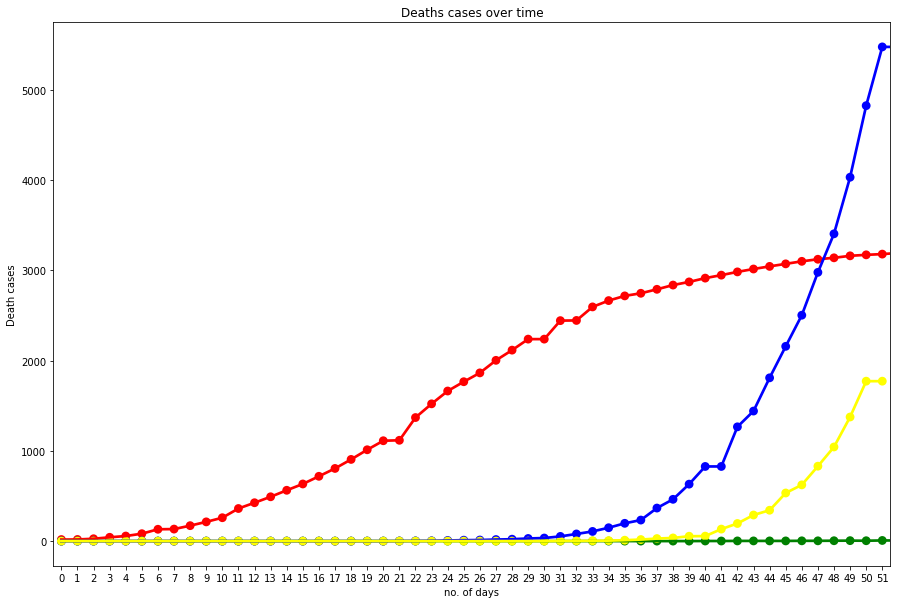

In [ ]:
#plot the death cases of 4 countries for analysis
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Deaths,color='Red')
sns.pointplot(india.index,india.Deaths,color='Green')
sns.pointplot(italy.index,italy.Deaths,color='Blue')
sns.pointplot(spain.index,spain.Deaths,color='Yellow')

plt.title('Deaths cases over time')
plt.ylabel('Death cases')
plt.xlabel('no. of days')
plt.show()

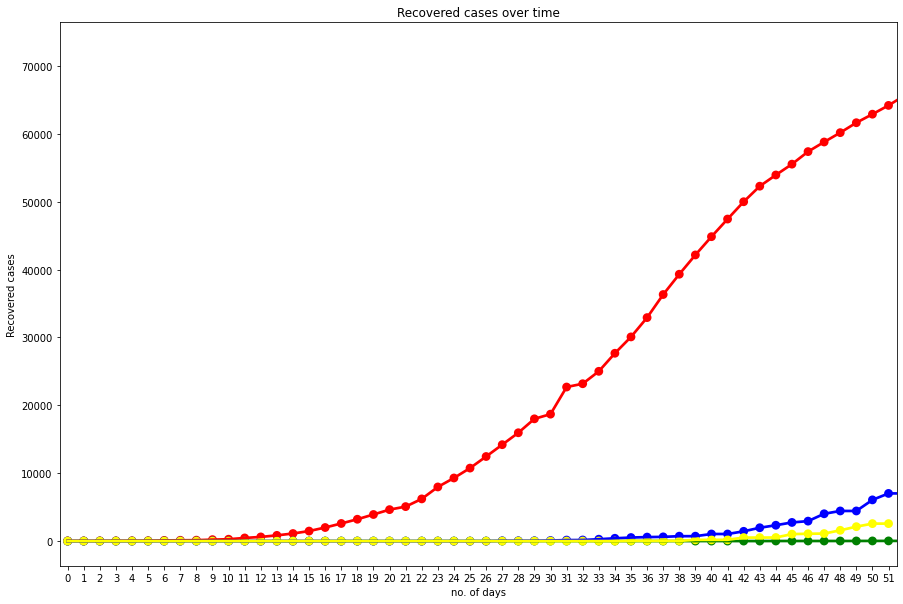

In [ ]:
#plot the Recovered cases of 4 countries for analysis
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Recovered,color='Red')
sns.pointplot(india.index,india.Recovered,color='Green')
sns.pointplot(italy.index,italy.Recovered,color='Blue')
sns.pointplot(spain.index,spain.Recovered,color='Yellow')

plt.title('Recovered cases over time')
plt.ylabel('Recovered cases')
plt.xlabel('no. of days')
plt.show()

In [ ]:
#@title Particular in INDIA (STATES)


In [ ]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Load the dataset
data=pd.read_excel('/content/covid_19_india.xlsx')
data.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [ ]:
#Adding an extra column name Total_case to get the idea on overall cases for each state/UT
data['Total_case']=data['Total Confirmed cases (Indian National)']+data['Total Confirmed cases ( Foreign National )']
data.head()
data.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death',
       'Total_case'],
      dtype='object')

In [ ]:
data=data.rename(columns={'Name of State / UT':'state','Total Confirmed cases (Indian National)':'Totalconfirmedcases(Indian National)','Total Confirmed cases ( Foreign National )':'Totalconfirmedcases(Foreign National)'})
data.head()

,S. No.,state,Totalconfirmedcases(Indian National),Totalconfirmedcases(Foreign National),Cured,Death,Total_case
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33


In [ ]:
#Load the dataset of perday cases of each country present in the excel sheet
data_india=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='India')
data_Itay=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
data_Wuhan=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')
data_korea=pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')


In [ ]:
#Getting the Highest total_active states in India
data['Total_active']=data['Total_case']-(data['Death']+data['Cured'])
totalactive=data['Total_active'].sum()
print(f'Total active cases in INDIA are: {totalactive}')
tcase=data.groupby('state')['Total_active'].sum().sort_values(ascending=False).to_frame()
tcase.style.background_gradient(cmap='pink')

Total active cases in INDIA are: 512


,Total_active
state,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


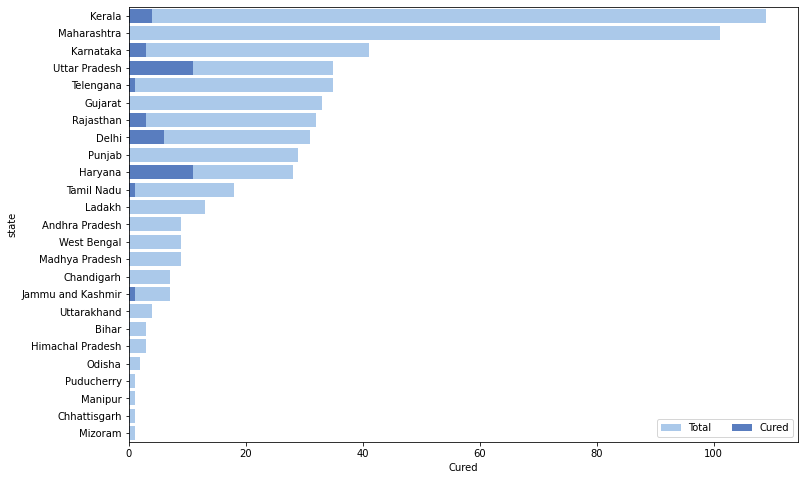

In [ ]:
#ploting the total case and total cured

pl1, pl= plt.subplots(figsize=(12,8))
data1 = data[['state','Total_case','Cured','Death']]
data1.sort_values('Total_case' , ascending=False,inplace=True)
sns.set_color_codes('pastel')
sns.barplot(x='Total_case',y='state',data=data1,label='Total', color='b')


sns.set_color_codes('muted')
sns.barplot(x='Cured',y='state',data=data1,label='Cured', color='b')

pl.legend(ncol=2, loc='lower right', frameon=True)


In [ ]:
#@title Performing Time series analysis using FB Prophet


In [ ]:
# import FB prophet package
from fbprophet import Prophet

In [ ]:
# Loading the dataset for time series analysis

data=pd.read_csv("/content/covid_19_clean_complete.csv",parse_dates=['Date'])
data=data.rename(columns={'Province/State':'state','Country/Region':'country'})

dat_confirmed=pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
dat_recovered=pd.read_csv("/content/time_series_covid19_recovered_global.csv")
dat_death=pd.read_csv("/content/time_series_covid19_recovered_global.csv")

dat_death=dat_death.rename(columns={'Country/Region': 'country'})
dat_recovered=dat_recovered.rename(columns={'Country/Region': 'country'})
dat_confirmed=dat_confirmed.rename(columns={'Country/Region': 'country'})


In [ ]:
#grouping the data with DATE, COUNTRY, STATE
data2=data.groupby(['Date','country','state'])[['Date','state','country','Confirmed','Deaths','Recovered']]
data2.head(5)

,Date,state,country,Confirmed,Deaths,Recovered
0,2020-01-22,NaN,Thailand,2.0,0.0,0.0
1,2020-01-22,NaN,Japan,2.0,0.0,0.0
2,2020-01-22,NaN,Singapore,0.0,0.0,0.0
3,2020-01-22,NaN,Nepal,0.0,0.0,0.0
4,2020-01-22,NaN,Malaysia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [ ]:
# creating dataframe for INDIA where we will be getting data only for INDIA
d_india=data.query('country=="India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()
india_confirmed,india_recovered,india_death = d_india[['Date','Confirmed']],d_india[['Date','Recovered']],d_india[['Date','Deaths']]

In [ ]:
#@title Time series for Confirmed cases

In [ ]:
#Pulling only the Confirmed data,deaths data, recovered data and storing it in their respective variables
confirmed=data.groupby('Date').sum()['Confirmed'].reset_index()
deaths=data.groupby('Date').sum()['Deaths'].reset_index()
recovered=data.groupby('Date').sum()['Recovered'].reset_index()

In [ ]:
#converting the column names to ds and y for prophet model
print(confirmed.head())
confirmed.columns=['ds','y']
confirmed.head()

        date       y
0 2020-01-22   554.0
1 2020-01-23   652.0
2 2020-01-24   939.0
3 2020-01-25  1432.0
4 2020-01-26  2113.0


,ds,y
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [ ]:
#converting it to correct date and time form
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.head()

,ds,y
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [ ]:
#Building the Prophet model and fitting into it
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
#Predicting the model
forcast=m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872974,335989.181287,376817.124961
65,2020-03-27,372235.326938,350169.495118,392180.268949
66,2020-03-28,388674.964142,367968.792232,410127.351904
67,2020-03-29,405307.954675,384295.368696,427889.437194
68,2020-03-30,418529.648466,396536.863500,442014.478771


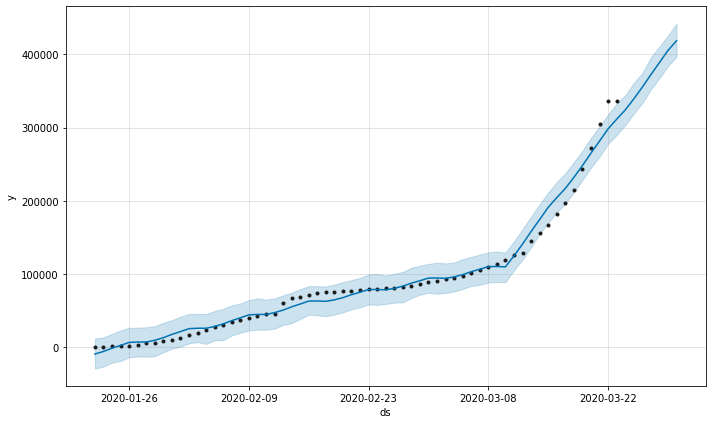

In [ ]:
#Ploting the confirmed cases prediction
confirmed_forcast_plot=m.plot(forcast)

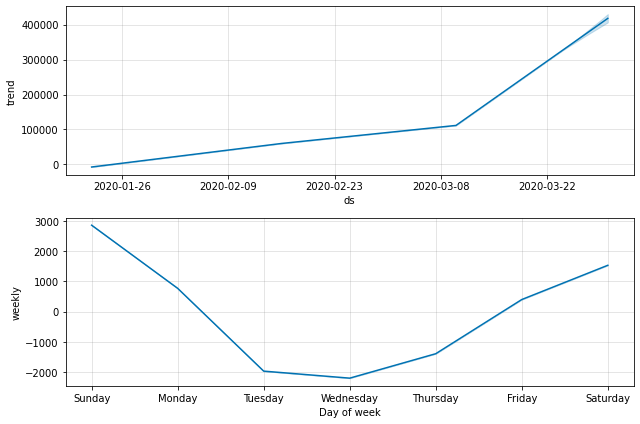

In [ ]:
confirmed_forcast_plot=m.plot_components(forcast)

In [ ]:
#@title Time series for Deaths cases


In [ ]:
#converting the column names to ds and y for prophet model
print(deaths.head())
deaths.columns=['ds','y']
deaths.head()

          ds     y
0 2020-01-22  17.0
1 2020-01-23  18.0
2 2020-01-24  26.0
3 2020-01-25  42.0
4 2020-01-26  56.0


,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


In [ ]:
#converting date and time as correct form
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths.head()

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


In [ ]:
#Building the Prophet model and fitting into it
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:

#Predicting the model

forcast=m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14478.397104,16312.693267
65,2020-03-27,16199.617603,15257.664391,17124.387696
66,2020-03-28,17006.904589,16097.417807,17970.485282
67,2020-03-29,17831.505383,16830.082775,18855.878639
68,2020-03-30,18490.986176,17440.859491,19543.791344


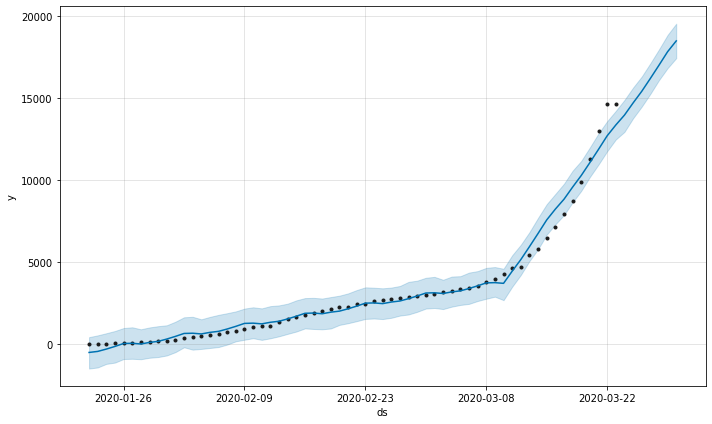

In [ ]:
#Ploting the confirmed cases prediction
deaths_forcast_plot=m.plot(forcast)

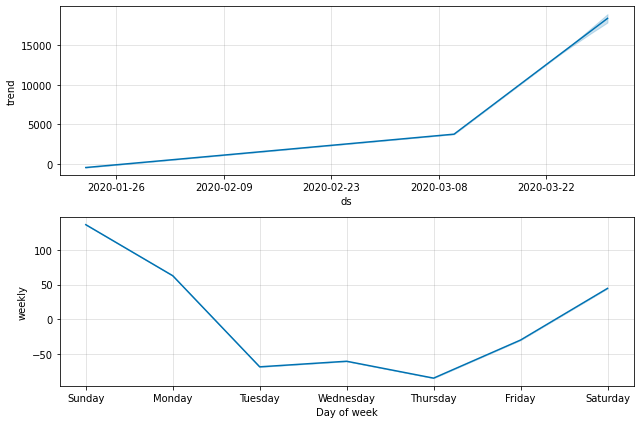

In [ ]:
deaths_forcast_plot=m.plot_components(forcast)

In [ ]:
#@title Time series for recovered cases


In [ ]:
#converting the column names to ds and y for prophet model

print(recovered.head())
recovered.columns=['ds','y']
recovered.head()

          ds     y
0 2020-01-22  28.0
1 2020-01-23  30.0
2 2020-01-24  36.0
3 2020-01-25  39.0
4 2020-01-26  52.0


,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [ ]:
#converting date and time as correct form

recovered['ds']=pd.to_datetime(recovered['ds'])
recovered.head()

,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [ ]:
#Building the Prophet model and fitting into it

m=Prophet(interval_width=0.95)
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
#Predicting the model

forcast=m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.349375,101316.935076,104756.667881
65,2020-03-27,105338.022248,103572.528182,107267.931291
66,2020-03-28,108256.307711,106191.213118,110241.812470
67,2020-03-29,111119.292707,108611.013808,113641.720789
68,2020-03-30,113244.957967,110334.028409,116071.489285


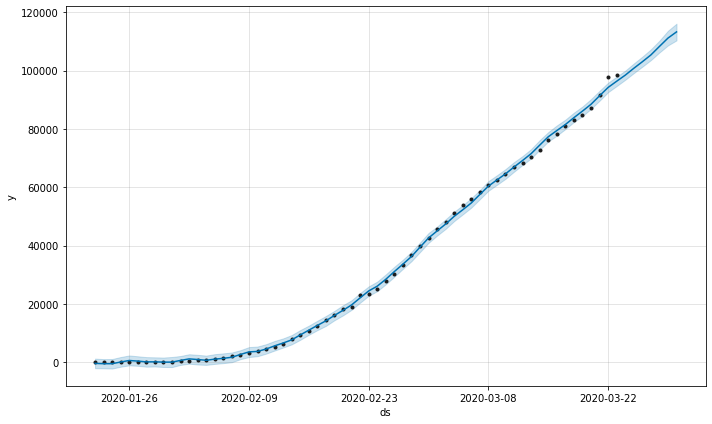

In [ ]:
#Ploting the confirmed cases prediction
recovered_forcast_plot=m.plot(forcast)

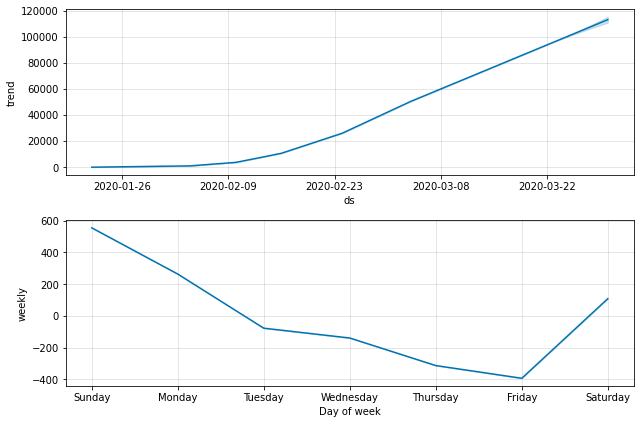

In [ ]:
recovered_forcast_plot=m.plot_components(forcast)